In [25]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [338]:
df = pd.read_csv('merged_partially_clean2.csv')  

In [319]:
df

,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CROP.ZS,AG.LND.FRST.K2,AG.LND.FRST.ZS,AG.LND.TOTL.K2,AG.SRF.TOTL.K2,BX.KLT.DINV.CD.WD,...,TX.VAL.MRCH.HI.ZS,TX.VAL.MRCH.OR.ZS,TX.VAL.MRCH.R1.ZS,TX.VAL.MRCH.R2.ZS,TX.VAL.MRCH.R3.ZS,TX.VAL.MRCH.R4.ZS,TX.VAL.MRCH.R5.ZS,TX.VAL.MRCH.R6.ZS,TX.VAL.MRCH.RS.ZS,TX.VAL.MRCH.WL.CD
0,6556857.12,44.168345,0.187475,8.205575,0.758975,4544314.78,30.611444,1.484515e+07,1.516208e+07,1.358898e+10,...,40.701366,32.321278,22.884382,0.885232,0.615816,0.896632,6.830489,22.484551,4.701532,2.120827e+11
1,380100.00,58.276988,0.212447,11.949772,0.331172,12084.40,1.852782,6.522300e+05,6.528600e+05,1.194351e+08,...,4.154670,11.556247,3.459874,3.875497,NaN,4.218877,84.289083,0.001999,0.000000,8.751810e+08
2,3591824.60,39.707185,0.226935,11.104848,2.009313,1807898.60,19.986100,9.045780e+06,9.166270e+06,1.549284e+10,...,42.843273,42.325050,18.945870,0.683140,2.138618,0.502607,20.054815,13.871657,0.960020,1.402509e+11
3,569524.90,45.682594,0.156682,3.930376,0.252667,677175.10,54.317406,1.246700e+06,1.246700e+06,-6.456076e+09,...,22.526825,73.096094,63.435122,0.016089,0.369772,0.009031,9.266081,3.334978,1.042103,4.052652e+10
4,11740.81,42.849672,0.213282,22.311898,3.089562,7889.00,28.791971,2.740000e+04,2.875000e+04,1.204383e+09,...,79.158813,2.670186,1.987578,18.162646,0.091024,0.335953,0.201735,0.053896,0.008354,3.099404e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226,415.00,14.664311,0.061642,4.240283,8.303887,1664.90,58.830389,2.830000e+03,2.840000e+03,3.364351e+05,...,92.417492,1.083743,5.734403,0.000060,0.106169,0.547471,0.429705,0.000337,0.764363,6.045466e+07
2227,235790.00,44.659734,0.052174,2.445215,0.545486,5490.00,1.039832,5.279700e+05,5.279700e+05,1.886418e+08,...,33.242910,65.054965,29.047496,0.033520,0.628703,1.344542,34.159902,1.185344,0.357584,6.374843e+09
2228,968910.00,79.871238,0.242020,10.331468,0.354467,174140.90,14.355151,1.213090e+06,1.219090e+06,3.693272e+09,...,47.655333,18.267388,11.219926,0.866739,1.479262,0.846305,3.855155,24.613865,9.463414,9.134579e+10
2229,234360.00,31.525848,0.246518,4.573642,0.048427,466960.00,62.814942,7.433900e+05,7.526100e+05,1.729300e+09,...,59.209252,21.744213,20.647184,0.099195,0.005448,0.685015,0.307371,19.040930,0.005605,7.188581e+09


In [262]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Select the columns to drop
to_drop = []
for col in corr_matrix.columns:
    corr = corr_matrix.loc['NY.GDP.MKTP.KD', col]
    if corr > 0.95 or (corr < 0.20 and corr != 1):
        to_drop.append(col)

# Drop the selected columns from the dataframe
df = df.drop(to_drop, axis=1)

In [3]:
# ESCALAMOS LOS DATOS DEL DATAFRAME
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_array = scaler.fit_transform(df)
df = pd.DataFrame(scaled_array, columns=df.columns, index=df.index)


In [203]:
# OTRA FORMA DE ESCALAR SIN OBTENER VALORES NEGATIVOS
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler and specify the range of scaled values
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the DataFrame using the scaler
df_scaled = scaler.fit_transform(df)

# Convert the scaled numpy array back to a DataFrame
df = pd.DataFrame(df_scaled, columns=df.columns, index=df.index)

In [7]:
df = df.apply(lambda x: np.log(x) if np.issubdtype(x.dtype, np.number) else x)

/Users/adriangarcia/anaconda3/envs/deep_learning/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [266]:
for i in df.columns:
    print(i)

AG.LND.AGRI.K2
AG.LND.AGRI.ZS
AG.LND.ARBL.HA.PC
AG.LND.ARBL.ZS
AG.LND.CROP.ZS
AG.LND.FRST.K2
AG.LND.FRST.ZS
AG.LND.TOTL.K2
AG.SRF.TOTL.K2
BX.KLT.DINV.CD.WD
BX.KLT.DINV.WD.GD.ZS
BX.TRF.PWKR.CD.DT
EG.ELC.ACCS.RU.ZS
EG.ELC.ACCS.UR.ZS
EG.ELC.ACCS.ZS
EN.POP.DNST
ER.FSH.AQUA.MT
ER.FSH.CAPT.MT
ER.FSH.PROD.MT
IT.CEL.SETS
IT.CEL.SETS.P2
IT.MLT.MAIN
IT.MLT.MAIN.P2
IT.NET.BBND
IT.NET.BBND.P2
IT.NET.SECR.P6
NV.AGR.TOTL.CD
NV.AGR.TOTL.ZS
NV.IND.TOTL.CD
NV.IND.TOTL.ZS
NV.SRV.TOTL.CD
NV.SRV.TOTL.ZS
NY.ADJ.AEDU.GN.ZS
NY.ADJ.DKAP.GN.ZS
NY.ADJ.DMIN.GN.ZS
NY.GDP.COAL.RT.ZS
NY.GDP.DEFL.KD.ZG
NY.GDP.FRST.RT.ZS
NY.GDP.MINR.RT.ZS
NY.GDP.MKTP.CD
NY.GDP.MKTP.KD
NY.GDP.MKTP.KD.ZG
NY.GDP.MKTP.PP.CD
NY.GDP.NGAS.RT.ZS
NY.GDP.PCAP.CD
NY.GDP.PCAP.KD
NY.GDP.PCAP.KD.ZG
NY.GDP.PCAP.PP.CD
NY.GDP.PETR.RT.ZS
NY.GDP.TOTL.RT.ZS
NY.GNP.ATLS.CD
NY.GNP.MKTP.CD
NY.GNP.PCAP.CD
SE.PRM.DURS
SE.SEC.DURS
SH.DTH.0509
SH.DTH.1014
SH.DTH.1519
SH.DTH.2024
SH.DTH.IMRT
SH.DTH.MORT
SH.DTH.NMRT
SH.DYN.0509
SH.DYN.1014
SH.DYN.1519
SH.DYN.202

In [249]:
# Count the number of negative values in each column
neg_counts = (df < 0).sum()

# Print the columns with negative values and their counts
for col, count in neg_counts.items():
    if count > 0:
        print(f"Column '{col}' has {count} negative values.")

Column 'BX.KLT.DINV.CD.WD' has 112 negative values.
Column 'BX.KLT.DINV.WD.GD.ZS' has 112 negative values.
Column 'NY.GDP.DEFL.KD.ZG' has 201 negative values.
Column 'NY.GDP.MKTP.KD.ZG' has 202 negative values.
Column 'NY.GDP.PCAP.KD.ZG' has 430 negative values.
Column 'SM.POP.NETM' has 1311 negative values.
Column 'SP.POP.GROW' has 234 negative values.
Column 'SP.RUR.TOTL.ZG' has 882 negative values.
Column 'SP.URB.GROW' has 194 negative values.
Column 'TM.VAL.MRCH.RS.ZS' has 7 negative values.
Column 'TX.VAL.MRCH.RS.ZS' has 8 negative values.


In [250]:
# Find the indices where negative values are present
indices = df.where(df < 0).stack().index.tolist()

# Print the row and column index where negative values are present
for index in indices:
    print(f"Negative value found at row {index[0]} and column '{index[1]}'")

Negative value found at row 0 and column 'NY.GDP.PCAP.KD.ZG'
Negative value found at row 0 and column 'SM.POP.NETM'
Negative value found at row 1 and column 'NY.GDP.PCAP.KD.ZG'
Negative value found at row 1 and column 'SM.POP.NETM'
Negative value found at row 2 and column 'SM.POP.NETM'
Negative value found at row 3 and column 'BX.KLT.DINV.CD.WD'
Negative value found at row 3 and column 'BX.KLT.DINV.WD.GD.ZS'
Negative value found at row 3 and column 'NY.GDP.MKTP.KD.ZG'
Negative value found at row 3 and column 'NY.GDP.PCAP.KD.ZG'
Negative value found at row 4 and column 'SM.POP.NETM'
Negative value found at row 4 and column 'SP.POP.GROW'
Negative value found at row 4 and column 'SP.RUR.TOTL.ZG'
Negative value found at row 6 and column 'SM.POP.NETM'
Negative value found at row 6 and column 'SP.RUR.TOTL.ZG'
Negative value found at row 7 and column 'NY.GDP.MKTP.KD.ZG'
Negative value found at row 7 and column 'NY.GDP.PCAP.KD.ZG'
Negative value found at row 7 and column 'SP.RUR.TOTL.ZG'
Negat

In [67]:
# RELLENAR TODOS LOS NANS POR EL VALOR DE LA MEDIANA DE CADA COLUMNA
df = df.fillna(df.median())

In [216]:
# aplicar una transformación logarítmica
df['NY.GDP.MKTP.KD'] = np.log(df['NY.GDP.MKTP.KD'])

In [21]:
# SELECIONAMOS TODAS LAS FEATURES POSIBLES PARA EL MODELO Y EL TARGET
X = df.drop(['NY.GDP.MKTP.KD','NV.SRV.TOTL.CD', 'NY.GDP.MKTP.CD', 'NY.GDP.TOTL.RT.ZS', 'NY.GNP.ATLS.CD', 'TX.VAL.MRCH.AL.ZS','NV.IND.TOTL.CD', 'NY.GDP.PCAP.KD.ZG', 'TM.VAL.MRCH.R3.ZS', 'TX.VAL.MRCH.R2.ZS','NY.GDP.PCAP.CD', 'TM.VAL.MRCH.OR.ZS', 'TM.VAL.MRCH.R1.ZS', 'TX.VAL.MRCH.CD.WT'], axis=1)
y = df['NY.GDP.MKTP.KD']

In [22]:
# COMPROBAMOS CUALES SON LAS COLUMNAS QUE SON LAS MAS RELEVANTES PARA PREDECIR EL TARGET

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# Assuming that you have stored your scaled data in a variable named "X"
# and your target variable in a variable named "y"
# and you want to select the top 3 important features
selector = SelectFromModel(RandomForestRegressor(), max_features=5)
selector.fit(X, y)

# Print the selected feature indices
selected_features = selector.get_support(indices=True)

all_columns = df.columns.tolist()
selected_columns_names = [all_columns[i] for i in selected_features]

# Imprimir los nombres de las columnas seleccionadas
print(selected_columns_names)


['NY.GDP.NGAS.RT.ZS', 'SP.RUR.TOTL', 'TM.VAL.MRCH.AL.ZS', 'TM.VAL.MRCH.R6.ZS']


In [65]:
# SELECIONAMOS TODAS LAS FEATURES POSIBLES PARA EL MODELO Y EL TARGET
X = df.drop(['NY.GDP.MKTP.KD'], axis=1)
y = df['NY.GDP.MKTP.KD']

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
# Use chi-squared to score each feature's relationship with the target variable
selector = SelectKBest(chi2, k=5)

# Fit the selector to the data
selector.fit(X, y)

# Get the indices of the selected features
selected_features_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features_names = X.columns[selected_features_indices]

# Print the selected feature names
print(selected_features_names)

In [29]:
from sklearn.feature_selection import SelectKBest, f_regression

# Create X and y variables
X = df.drop(['NY.GDP.MKTP.KD','NV.SRV.TOTL.CD', 'NY.GDP.MKTP.CD', 'NY.GNP.ATLS.CD', 'NY.GNP.MKTP.CD',
       'TM.VAL.MRCH.CD.WT','NV.IND.TOTL.CD', 'NY.GDP.MKTP.PP.CD', 'TM.VAL.MRCH.WL.CD',
       'TX.VAL.MRCH.CD.WT', 'TX.VAL.MRCH.WL.CD','BX.KLT.DINV.CD.WD', 'SP.POP.65UP.FE.IN', 'SP.POP.65UP.MA.IN','ER.FSH.CAPT.MT', 'AG.LND.TOTL.K2', 'BX.TRF.PWKR.CD.DT', 'SP.POP.1564.FE.IN', 'SP.POP.1564.TO', 'SP.POP.1564.MA.IN'], axis=1)
y = df['NY.GDP.MKTP.KD']

# Use f_regression to score each feature's relationship with the target variable
selector = SelectKBest(f_regression, k=10)

# Fit the selector to the data
selector.fit(X, y)

# Get the indices of the selected features
selected_features_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features_names = X.columns[selected_features_indices]

# Print the selected feature names
print(selected_features_names)


Index(['AG.LND.AGRI.K2', 'AG.SRF.TOTL.K2', 'IT.CEL.SETS', 'IT.MLT.MAIN',
       'IT.NET.BBND', 'NV.AGR.TOTL.CD', 'SP.POP.65UP.TO', 'SP.POP.TOTL',
       'SP.POP.TOTL.FE.IN', 'SP.URB.TOTL'],
      dtype='object')


In [257]:
df = df.dropna()

In [239]:
df = df[['NY.GDP.MKTP.KD','AG.LND.TOTL.K2','SP.POP.65UP.TO','IT.MLT.MAIN','ER.FSH.CAPT.MT','SP.POP.TOTL','AG.LND.FRST.K2']]
df = df.dropna()

In [ ]:
X = df[['AG.SRF.TOTL.K2','SP.POP.65UP.TO','SP.POP.TOTL','SP.URB.TOTL','NY.ADJ.AEDU.GN.ZS','SH.DYN.MORT']]
y = df['NY.GDP.MKTP.KD']

In [240]:
X = df[['AG.LND.TOTL.K2','SP.POP.65UP.TO','IT.MLT.MAIN','ER.FSH.CAPT.MT','SP.POP.TOTL','AG.LND.FRST.K2']]
y = df['NY.GDP.MKTP.KD']

In [219]:
nan_counts = df.isna().sum()
for column_name, count in nan_counts.items():
    print(f"Column '{column_name}' has {count} NaN values.")

Column 'NY.GDP.MKTP.KD' has 0 NaN values.
Column 'AG.LND.TOTL.K2' has 0 NaN values.
Column 'SP.POP.65UP.TO' has 0 NaN values.
Column 'IT.MLT.MAIN' has 0 NaN values.
Column 'ER.FSH.CAPT.MT' has 0 NaN values.
Column 'SP.POP.TOTL' has 0 NaN values.
Column 'AG.LND.FRST.K2' has 0 NaN values.


In [226]:
num_complete_rows = df.isna().sum(axis=1).eq(0).sum()

# display the result
print("Number of rows with 0 NaNs:", num_complete_rows)

Number of rows with 0 NaNs: 2216


In [227]:
num_rows_with_few_nans = df.isna().sum(axis=1).lt(5).sum()

# display the result
print("Number of rows with less than 5 NaNs:", num_rows_with_few_nans)

Number of rows with less than 5 NaNs: 2216


In [20]:
X = df[['SP.POP.TOTL','SP.DYN.LE00.IN','NV.AGR.TOTL.ZS','NV.IND.TOTL.ZS','EG.ELC.ACCS.ZS', 'EN.POP.DNST']]
X

,SP.POP.TOTL,SP.DYN.LE00.IN,NV.AGR.TOTL.ZS,NV.IND.TOTL.ZS,EG.ELC.ACCS.ZS,EN.POP.DNST
0,0.083909,0.458455,0.196299,0.304236,0.404390,0.005278
1,0.004727,0.451105,0.363361,0.120139,0.964715,0.006845
2,0.057159,0.299098,0.345374,0.297966,0.491538,0.005926
3,0.004028,0.426931,0.141589,0.590073,0.429510,0.002932
4,0.000359,0.866556,0.303715,0.227501,1.000000,0.012918
...,...,...,...,...,...,...
2226,0.000014,0.687636,0.166917,0.139056,0.962055,0.008419
2227,0.003185,0.559438,0.134234,0.533602,0.589939,0.005667
2228,0.006677,0.343212,0.034296,0.282245,0.821689,0.005142
2229,0.001770,0.289033,0.155013,0.376593,0.186653,0.002112


In [264]:
df.columns

Index(['AG.LND.AGRI.K2', 'AG.LND.FRST.K2', 'AG.LND.TOTL.K2', 'AG.SRF.TOTL.K2',
       'BX.KLT.DINV.CD.WD', 'BX.TRF.PWKR.CD.DT', 'ER.FSH.AQUA.MT',
       'ER.FSH.CAPT.MT', 'ER.FSH.PROD.MT', 'IT.CEL.SETS', 'IT.MLT.MAIN',
       'IT.NET.BBND', 'IT.NET.BBND.P2', 'NV.AGR.TOTL.CD', 'NY.ADJ.DKAP.GN.ZS',
       'SH.DTH.0509', 'SH.DTH.1014', 'SH.DTH.1519', 'SH.DTH.2024',
       'SH.DTH.IMRT', 'SH.DTH.MORT', 'SH.DTH.NMRT', 'SP.POP.0014.FE.IN',
       'SP.POP.0014.MA.IN', 'SP.POP.0014.TO', 'SP.POP.1564.FE.IN',
       'SP.POP.1564.MA.IN', 'SP.POP.1564.TO', 'SP.POP.4549.FE.5Y',
       'SP.POP.4549.MA.5Y', 'SP.POP.5054.FE.5Y', 'SP.POP.5054.MA.5Y',
       'SP.POP.6064.FE.5Y', 'SP.POP.6064.MA.5Y', 'SP.POP.6569.MA.5Y',
       'SP.POP.65UP.FE.IN', 'SP.POP.65UP.MA.IN', 'SP.POP.65UP.MA.ZS',
       'SP.POP.65UP.TO', 'SP.POP.BRTH.MF', 'SP.POP.TOTL', 'SP.POP.TOTL.FE.IN',
       'SP.POP.TOTL.MA.IN', 'SP.RUR.TOTL', 'SP.URB.TOTL'],
      dtype='object')

In [323]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [62]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (2231, 6)
Train features shape: (1561, 6)
Train target shape: (1561,)
Test features shape: (670, 6)
Test target shape: (670,)


In [60]:
#importing the Linear Regression Algorithm
from sklearn.linear_model import LinearRegression

In [80]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [81]:
coeff_df = pd.DataFrame(lm.coef_,
                        X.columns,
                        columns=['Coefficient'])
coeff_df

,Coefficient
SP.POP.TOTL,6.059633e+03
SP.DYN.LE00.IN,2.283866e+11
NV.AGR.TOTL.ZS,-9.264810e+10
NV.IND.TOTL.ZS,-5.320160e+10
EG.ELC.ACCS.ZS,-3.969561e+10
EN.POP.DNST,-8.186593e+08


In [82]:
predictions = lm.predict(X_test)


In [83]:
from sklearn import metrics

lm.score(X_test, y_test) #ESTO SACA EL R^2

0.5909045298007636

In [84]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2692268849574.839
MSE: 3.961325242388197e+25
RMSE: 6293905975138.33


In [85]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_scal = std_scale.transform(X_train)

lm_scal = LinearRegression()
lm_scal.fit(X_train_scal, y_train)

intercept_scal = lm_scal.intercept_
features_std = pd.DataFrame(lm_scal.coef_, X_train.columns, columns=['coefficient'])

features_std.sort_values('coefficient', ascending=False)

,coefficient
SP.POP.TOTL,6.101847e+12
SP.DYN.LE00.IN,1.775633e+12
EN.POP.DNST,-5.028514e+11
NV.IND.TOTL.ZS,-5.992223e+11
NV.AGR.TOTL.ZS,-9.613848e+11
EG.ELC.ACCS.ZS,-1.080361e+12


In [87]:
nuevo_df.corr()

,NY.GDP.MKTP.KD,SP.POP.TOTL,SP.DYN.LE00.IN,NV.AGR.TOTL.ZS,NV.IND.TOTL.ZS,EG.ELC.ACCS.ZS,EN.POP.DNST
NY.GDP.MKTP.KD,1.000000,0.739981,0.172300,-0.175824,0.036397,0.147531,-0.054125
SP.POP.TOTL,0.739981,1.000000,-0.009559,-0.036854,0.123468,0.034218,-0.047495
SP.DYN.LE00.IN,0.172300,-0.009559,1.000000,-0.708305,0.017069,0.844685,0.167260
NV.AGR.TOTL.ZS,-0.175824,-0.036854,-0.708305,1.000000,-0.299201,-0.739078,-0.104419
NV.IND.TOTL.ZS,0.036397,0.123468,0.017069,-0.299201,1.000000,0.148385,-0.072974
EG.ELC.ACCS.ZS,0.147531,0.034218,0.844685,-0.739078,0.148385,1.000000,0.090993
EN.POP.DNST,-0.054125,-0.047495,0.167260,-0.104419,-0.072974,0.090993,1.000000


<Axes: >

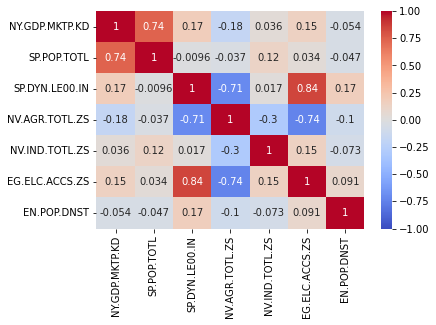

In [91]:
sns.heatmap(nuevo_df.corr(), cmap='coolwarm', annot=True, center=0, vmin=-1, vmax=1,)


In [ ]:
#PARA ELIMINAR:
'ER.FSH.AQUA.MT'
'ER.FSH.CAPT.MT'
'ER.FSH.PROD.MT'
'IT.CEL.SETS'
'IT.CEL.SETS.P2'
'IT.MLT.MAIN'
'IT.MLT.MAIN.P2'
'IT.NET.BBND'
'IT.NET.BBND.P2'
'IT.NET.SECR.P6'
'NY.GNP.ATLS.CD'
'NY.GNP.MKTP.CD'
'NY.GNP.PCAP.CD'



In [324]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train and evaluate different models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model's performance
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print the model's performance metrics
    print(f"{name}:")
    print(f"  Mean Squared Error: {mse:.5f}")
    print(f"  Root Mean Squared Error: {rmse:.2f}")
    print(f"  R-squared: {r2:.2f}")

Linear Regression:
  Mean Squared Error: 15.76833
  Root Mean Squared Error: 3.97
  R-squared: 0.73
Decision Tree:
  Mean Squared Error: 4.68608
  Root Mean Squared Error: 2.16
  R-squared: 0.92
Random Forest:
  Mean Squared Error: 2.38308
  Root Mean Squared Error: 1.54
  R-squared: 0.96


In [325]:
# Train and evaluate different models
models = {
    "AdaBoost": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor()
}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model's performance
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print the model's performance metrics
    print(f"{name}:")
    print(f"  Mean Squared Error: {mse:.5f}")
    print(f"  Root Mean Squared Error: {rmse:.2f}")
    print(f"  R-squared: {r2:.2f}")

AdaBoost:
  Mean Squared Error: 12.18135
  Root Mean Squared Error: 3.49
  R-squared: 0.79
Gradient Boosting:
  Mean Squared Error: 6.01504
  Root Mean Squared Error: 2.45
  R-squared: 0.90
XGBoost:
  Mean Squared Error: 1.78607
  Root Mean Squared Error: 1.34
  R-squared: 0.97


XGBoost:
  Mean Squared Error: 0.00063
  Root Mean Squared Error: 0.03
  R-squared: 0.95
MSE en la escala original: 2.5018092880092775


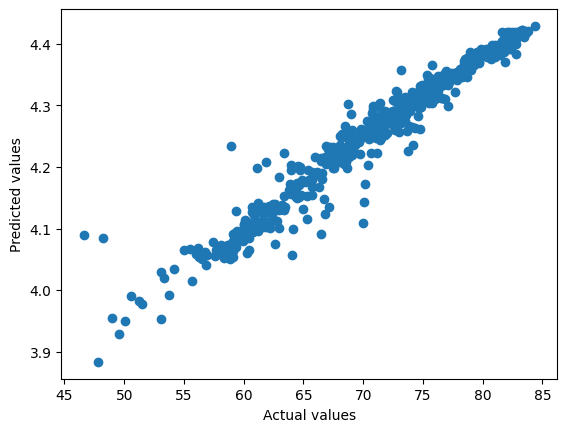

In [326]:
y_true = y_test
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

# Train XGBoost
models = {"XGBoost": XGBRegressor()}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train_log)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model's performance
    mse = mean_squared_error(y_test_log, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_log, y_pred)

    # Print the model's performance metrics
    print(f"{name}:")
    print(f"  Mean Squared Error: {mse:.5f}")
    print(f"  Root Mean Squared Error: {rmse:.2f}")
    print(f"  R-squared: {r2:.2f}")

# Aplicar la transformación inversa del logaritmo a las predicciones
y_pred_orig = np.exp(y_pred)

# Calcular el error cuadrático en la escala original
mse_orig = np.mean((y_pred_orig - y_true) ** 2)

# Verificar el valor del MSE en la escala original
print("MSE en la escala original:", mse_orig)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()


In [327]:
from sklearn.linear_model import ElasticNet, Ridge, Lasso, BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score

# Train and evaluate different models
models = {
    "ElasticNet": ElasticNet(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Bayesian Ridge": BayesianRidge()
}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model's performance
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print the model's performance metrics
    print(f"{name}:")
    print(f"  Mean Squared Error: {mse:.5f}")
    print(f"  Root Mean Squared Error: {rmse:.2f}")
    print(f"  R-squared: {r2:.2f}")


ElasticNet:
  Mean Squared Error: 15.76635
  Root Mean Squared Error: 3.97
  R-squared: 0.73
Ridge:
  Mean Squared Error: 15.76833
  Root Mean Squared Error: 3.97
  R-squared: 0.73
Lasso:
  Mean Squared Error: 15.76538
  Root Mean Squared Error: 3.97
  R-squared: 0.73
Bayesian Ridge:
  Mean Squared Error: 15.76762
  Root Mean Squared Error: 3.97
  R-squared: 0.73


/Users/adriangarcia/anaconda3/envs/deep_learning/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.17282e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [328]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grids to search over
en_param_grid = {"alpha": [0.01, 0.1, 1.0],
                 "l1_ratio": [0.25, 0.5, 0.75]}
ridge_param_grid = {"alpha": [0.01, 0.1, 1.0]}
lasso_param_grid = {"alpha": [0.01, 0.1, 1.0]}
br_param_grid = {"alpha_1": [1e-6, 1e-5, 1e-4],
                 "alpha_2": [1e-6, 1e-5, 1e-4],
                 "lambda_1": [1e-6, 1e-5, 1e-4],
                 "lambda_2": [1e-6, 1e-5, 1e-4]}

# Create a dictionary of the models and their corresponding hyperparameter grids
models = {
    "ElasticNet": (ElasticNet(), en_param_grid),
    "Ridge": (Ridge(), ridge_param_grid),
    "Lasso": (Lasso(), lasso_param_grid),
    "Bayesian Ridge": (BayesianRidge(), br_param_grid)
}

# Perform hyperparameter tuning for each model using GridSearchCV
for name, (model, param_grid) in models.items():
    # Create a GridSearchCV object
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring="neg_mean_squared_error")

    # Fit the GridSearchCV object to the training data
    grid_search.fit(X_train, y_train)

    # Print the best hyperparameters and corresponding score for the model
    print(f"{name}:")
    print(f"  Best Hyperparameters: {grid_search.best_params_}")
    print(f"  Best Score: {-grid_search.best_score_:.5f}")


/Users/adriangarcia/anaconda3/envs/deep_learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.825e+03, tolerance: 7.133e+00
  model = cd_fast.enet_coordinate_descent(
/Users/adriangarcia/anaconda3/envs/deep_learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.179e+03, tolerance: 6.850e+00
  model = cd_fast.enet_coordinate_descent(
/Users/adriangarcia/anaconda3/envs/deep_learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, c

ElasticNet:
  Best Hyperparameters: {'alpha': 0.1, 'l1_ratio': 0.25}
  Best Score: 13.98229
Ridge:
  Best Hyperparameters: {'alpha': 1.0}
  Best Score: 13.98229
Lasso:
  Best Hyperparameters: {'alpha': 0.01}
  Best Score: 13.98229


/Users/adriangarcia/anaconda3/envs/deep_learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.735e+03, tolerance: 8.881e+00
  model = cd_fast.enet_coordinate_descent(


Bayesian Ridge:
  Best Hyperparameters: {'alpha_1': 0.0001, 'alpha_2': 1e-06, 'lambda_1': 1e-06, 'lambda_2': 0.0001}
  Best Score: 13.98230


In [329]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_ridge import KernelRidge

# Definir el pipeline
model = make_pipeline(StandardScaler(), 
                      GridSearchCV(KernelRidge(), 
                                   param_grid={'alpha': [0.1, 1, 10], 
                                               'kernel': ['linear', 'rbf', 'poly']}, 
                                   cv=5))

# Entrenar el modelo
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.5f}")
print(f"Root Mean Squared Error: {rmse:.5f}")
print(f"R-squared: {r2:.5f}")


Mean Squared Error: 12.62130
Root Mean Squared Error: 3.55265
R-squared: 0.78334


In [79]:
import pandas as pd

# Calculate the Pearson correlation matrix
corr_matrix = df.corr(method='pearson')

# Find the features that are highly correlated with the target variable
corr_with_target = corr_matrix['NY.GDP.MKTP.KD'].abs().sort_values(ascending=False)

# Print the correlation coefficients and feature names
corr_with_target
print(corr_with_target.to_string())




NY.GDP.MKTP.KD          1.000000
NY.GDP.MKTP.CD          0.998804
NY.GNP.MKTP.CD          0.998749
NY.GNP.ATLS.CD          0.998667
NV.SRV.TOTL.CD          0.992146
TM.VAL.MRCH.CD.WT       0.983680
TM.VAL.MRCH.WL.CD       0.983474
TX.VAL.MRCH.WL.CD       0.978216
NV.IND.TOTL.CD          0.978209
TX.VAL.MRCH.CD.WT       0.978066
NY.GDP.MKTP.PP.CD       0.962641
IT.MLT.MAIN             0.929631
BX.KLT.DINV.CD.WD       0.927822
IT.NET.BBND             0.906705
SP.POP.65UP.FE.IN       0.880094
SP.POP.65UP.TO          0.876913
SP.POP.65UP.MA.IN       0.872502
SP.URB.TOTL             0.816801
ER.FSH.CAPT.MT          0.815518
AG.SRF.TOTL.K2          0.809503
AG.LND.TOTL.K2          0.804300
AG.LND.AGRI.K2          0.795315
NV.AGR.TOTL.CD          0.793971
BX.TRF.PWKR.CD.DT       0.790413
IT.CEL.SETS             0.778150
SP.POP.1564.FE.IN       0.746532
SP.POP.1564.TO          0.745813
SP.POP.1564.MA.IN       0.745080
SP.POP.TOTL.FE.IN       0.742104
SP.POP.TOTL             0.739287
ER.FSH.PRO

In [207]:
df.describe()

,NY.GDP.MKTP.KD,AG.LND.TOTL.K2,SP.POP.65UP.TO,IT.MLT.MAIN,ER.FSH.CAPT.MT,SP.POP.TOTL,AG.LND.FRST.K2
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,0.034248,0.045976,0.040769,0.034625,0.043991,0.046140,0.046452
std,0.105696,0.119767,0.116543,0.103690,0.126359,0.130194,0.127167
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000170,0.000369,0.000371,0.000138,0.000165,0.000506,0.000231
50%,0.000996,0.002353,0.001335,0.000985,0.001596,0.002006,0.001600
75%,0.011337,0.016535,0.014093,0.007855,0.021300,0.013711,0.011657
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [175]:
df['NY.GDP.MKTP.KD'].min()

1034300993.92112

In [174]:
df['NY.GDP.MKTP.KD'].max()

52386768723808.0

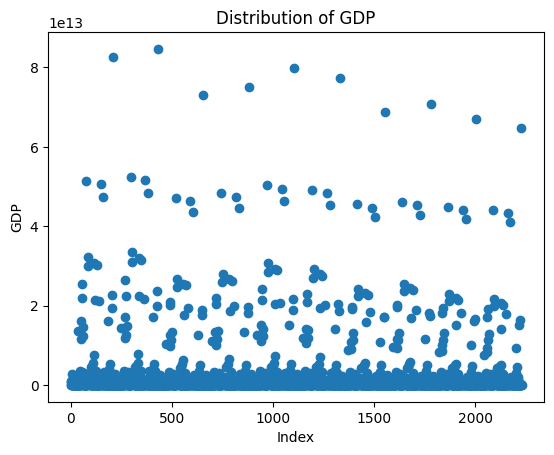

In [314]:
import matplotlib.pyplot as plt

# Create a scatter plot of the NY.GDP.MKTP.KD column
plt.scatter(range(len(df)), df['NY.GDP.MKTP.KD'])

# Set the x-axis label and title of the plot
plt.xlabel('Index')
plt.ylabel('GDP')
plt.title('Distribution of GDP')

# Display the plot
plt.show()


In [208]:
df = df[df['NY.GDP.MKTP.KD'] <= 6e13]

In [209]:
df = df[df['NY.GDP.MKTP.KD'] >= 1e9]

In [146]:
# Get the indices of the 20 rows with the highest and lowest values of NY.GDP.MKTP.KD
n = 100
highest_indices = df['NY.GDP.MKTP.KD'].nlargest(n).index
lowest_indices = df['NY.GDP.MKTP.KD'].nsmallest(n).index

# Concatenate the remaining rows
df = pd.concat([df.drop(highest_indices), df.drop(lowest_indices)])

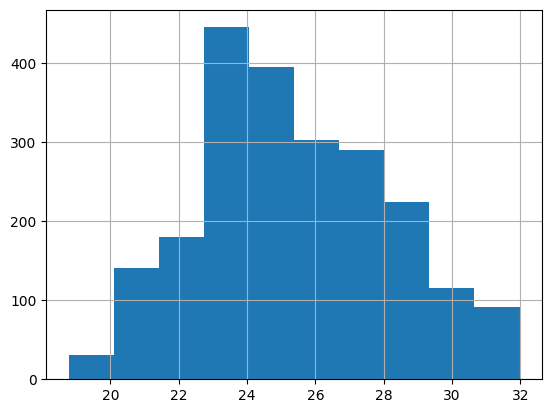

In [229]:
df['NY.GDP.MKTP.KD'].hist()
plt.show()

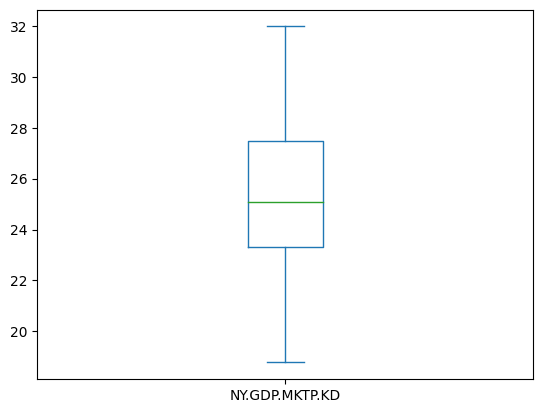

In [230]:
import matplotlib.pyplot as plt

df['NY.GDP.MKTP.KD'].plot.box()
plt.show()


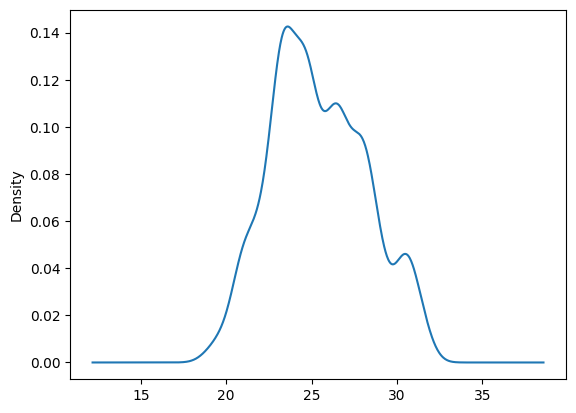

In [231]:
import matplotlib.pyplot as plt

df['NY.GDP.MKTP.KD'].plot.density()
plt.show()


In [296]:
df = df[['NY.GDP.MKTP.KD','SP.DYN.AMRT.FE', 'SP.DYN.AMRT.MA', 'SP.DYN.CBRT.IN', 'SP.DYN.CDRT.IN', 'SP.DYN.IMRT.FE.IN', 
       'SP.DYN.IMRT.IN', 'SP.DYN.IMRT.MA.IN', 'SP.DYN.LE00.FE.IN', 'SP.DYN.LE00.IN', 'SP.DYN.LE00.MA.IN',
       'SP.DYN.TFRT.IN', 'SP.DYN.TO65.FE.ZS', 'SP.DYN.TO65.MA.ZS', 'SP.POP.0004.FE.5Y', 'SP.POP.0004.MA.5Y',
       'SP.POP.0014.FE.IN', 'SP.POP.0014.FE.ZS', 'SP.POP.0014.MA.IN', 'SP.POP.0014.MA.ZS', 'SP.POP.0014.TO',
       'SP.POP.0014.TO.ZS', 'SP.POP.0509.FE.5Y', 'SP.POP.0509.MA.5Y', 'SP.POP.1014.FE.5Y', 'SP.POP.1014.MA.5Y',
       'SP.POP.1519.FE.5Y', 'SP.POP.1519.MA.5Y', 'SP.POP.1564.FE.IN', 'SP.POP.1564.FE.ZS', 'SP.POP.1564.MA.IN',
       'SP.POP.1564.MA.ZS', 'SP.POP.1564.TO', 'SP.POP.1564.TO.ZS', 'SP.POP.2024.FE.5Y', 'SP.POP.2024.MA.5Y',
       'SP.POP.2529.FE.5Y', 'SP.POP.2529.MA.5Y', 'SP.POP.3034.FE.5Y', 'SP.POP.3034.MA.5Y', 'SP.POP.3539.FE.5Y',
       'SP.POP.3539.MA.5Y', 'SP.POP.4044.FE.5Y', 'SP.POP.4044.MA.5Y', 'SP.POP.4549.FE.5Y', 'SP.POP.4549.MA.5Y',
       'SP.POP.5054.FE.5Y', 'SP.POP.5054.MA.5Y', 'SP.POP.5559.FE.5Y', 'SP.POP.5559.MA.5Y', 'SP.POP.6064.FE.5Y',
       'SP.POP.6064.MA.5Y', 'SP.POP.6569.FE.5Y', 'SP.POP.6569.MA.5Y', 'SP.POP.65UP.FE.IN', 'SP.POP.65UP.FE.ZS',
       'SP.POP.65UP.MA.IN', 'SP.POP.65UP.MA.ZS', 'SP.POP.65UP.TO', 'SP.POP.65UP.TO.ZS', 'SP.POP.7074.FE.5Y',
       'SP.POP.7074.MA.5Y', 'SP.POP.7579.FE.5Y', 'SP.POP.7579.MA.5Y', 'SP.POP.80UP.FE.5Y', 'SP.POP.80UP.MA.5Y',
       'SP.POP.BRTH.MF', 'SP.POP.DPND', 'SP.POP.DPND.OL', 'SP.POP.DPND.YG', 'SP.POP.GROW', 'SP.POP.TOTL',
       'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.IN', 'SP.POP.TOTL.MA.ZS', 'SP.RUR.TOTL',
       'SP.RUR.TOTL.ZG', 'SP.RUR.TOTL.ZS', 'SP.URB.GROW', 'SP.URB.TOTL', 'SP.URB.TOTL.IN.ZS',
       
       'SH.DTH.0509', 'SH.DTH.1014', 'SH.DTH.1519', 'SH.DTH.2024', 'SH.DTH.IMRT', 'SH.DTH.MORT', 'SH.DTH.NMRT', 'SH.DYN.0509', 'SH.DYN.1014', 'SH.DYN.1519', 'SH.DYN.2024', 'SH.DYN.MORT',
       'SH.STA.BASS.ZS',

       'AG.SRF.TOTL.K2']]

df = df.dropna()

In [297]:
X = df[['SP.DYN.AMRT.FE', 'SP.DYN.AMRT.MA', 'SP.DYN.CBRT.IN', 'SP.DYN.CDRT.IN', 'SP.DYN.IMRT.FE.IN', 
       'SP.DYN.IMRT.IN', 'SP.DYN.IMRT.MA.IN', 'SP.DYN.LE00.FE.IN', 'SP.DYN.LE00.IN', 'SP.DYN.LE00.MA.IN',
       'SP.DYN.TFRT.IN', 'SP.DYN.TO65.FE.ZS', 'SP.DYN.TO65.MA.ZS', 'SP.POP.0004.FE.5Y', 'SP.POP.0004.MA.5Y',
       'SP.POP.0014.FE.IN', 'SP.POP.0014.FE.ZS', 'SP.POP.0014.MA.IN', 'SP.POP.0014.MA.ZS', 'SP.POP.0014.TO',
       'SP.POP.0014.TO.ZS', 'SP.POP.0509.FE.5Y', 'SP.POP.0509.MA.5Y', 'SP.POP.1014.FE.5Y', 'SP.POP.1014.MA.5Y',
       'SP.POP.1519.FE.5Y', 'SP.POP.1519.MA.5Y', 'SP.POP.1564.FE.IN', 'SP.POP.1564.FE.ZS', 'SP.POP.1564.MA.IN',
       'SP.POP.1564.MA.ZS', 'SP.POP.1564.TO', 'SP.POP.1564.TO.ZS', 'SP.POP.2024.FE.5Y', 'SP.POP.2024.MA.5Y',
       'SP.POP.2529.FE.5Y', 'SP.POP.2529.MA.5Y', 'SP.POP.3034.FE.5Y', 'SP.POP.3034.MA.5Y', 'SP.POP.3539.FE.5Y',
       'SP.POP.3539.MA.5Y', 'SP.POP.4044.FE.5Y', 'SP.POP.4044.MA.5Y', 'SP.POP.4549.FE.5Y', 'SP.POP.4549.MA.5Y',
       'SP.POP.5054.FE.5Y', 'SP.POP.5054.MA.5Y', 'SP.POP.5559.FE.5Y', 'SP.POP.5559.MA.5Y', 'SP.POP.6064.FE.5Y',
       'SP.POP.6064.MA.5Y', 'SP.POP.6569.FE.5Y', 'SP.POP.6569.MA.5Y', 'SP.POP.65UP.FE.IN', 'SP.POP.65UP.FE.ZS',
       'SP.POP.65UP.MA.IN', 'SP.POP.65UP.MA.ZS', 'SP.POP.65UP.TO', 'SP.POP.65UP.TO.ZS', 'SP.POP.7074.FE.5Y',
       'SP.POP.7074.MA.5Y', 'SP.POP.7579.FE.5Y', 'SP.POP.7579.MA.5Y', 'SP.POP.80UP.FE.5Y', 'SP.POP.80UP.MA.5Y',
       'SP.POP.BRTH.MF', 'SP.POP.DPND', 'SP.POP.DPND.OL', 'SP.POP.DPND.YG', 'SP.POP.GROW', 'SP.POP.TOTL',
       'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.IN', 'SP.POP.TOTL.MA.ZS', 'SP.RUR.TOTL',
       'SP.RUR.TOTL.ZG', 'SP.RUR.TOTL.ZS', 'SP.URB.GROW', 'SP.URB.TOTL', 'SP.URB.TOTL.IN.ZS',
       
       'SH.DTH.0509', 'SH.DTH.1014', 'SH.DTH.1519', 'SH.DTH.2024', 'SH.DTH.IMRT', 'SH.DTH.MORT', 'SH.DTH.NMRT', 'SH.DYN.0509', 'SH.DYN.1014', 'SH.DYN.1519', 'SH.DYN.2024', 'SH.DYN.MORT',
       'SH.STA.BASS.ZS',
       'AG.SRF.TOTL.K2']]

y = df['NY.GDP.MKTP.KD']

In [333]:
df = df[['SP.DYN.LE00.IN','NY.GDP.MKTP.KD','SP.POP.TOTL','AG.SRF.TOTL.K2']]
df = df.dropna()

In [334]:
X = df[['NY.GDP.MKTP.KD','SP.POP.TOTL','AG.SRF.TOTL.K2']]
y = df['SP.DYN.LE00.IN']

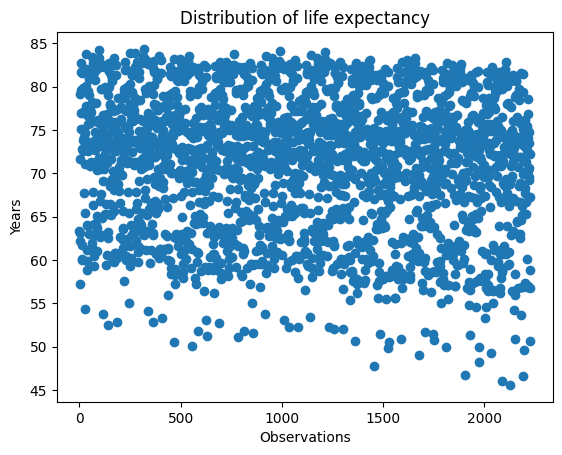

In [336]:
import matplotlib.pyplot as plt

# Create a scatter plot of the NY.GDP.MKTP.KD column
plt.scatter(range(len(df)), df['SP.DYN.LE00.IN'])

# Set the x-axis label and title of the plot
plt.xlabel('Observations')
plt.ylabel('Years')
plt.title('Distribution of life expectancy')

# Display the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt

df['SP.DYN.LE00.IN'].plot.density()
plt.show()

In [339]:
import pandas as pd

# Calculate the Pearson correlation matrix
corr_matrix = df.corr(method='pearson')

# Find the features that are highly correlated with the target variable
corr_with_target = corr_matrix['SP.DYN.LE00.IN'].abs().sort_values(ascending=False)

# Print the correlation coefficients and feature names
corr_with_target
print(corr_with_target.to_string())


SP.DYN.LE00.IN          1.000000
SP.DYN.LE00.FE.IN       0.993860
SP.DYN.LE00.MA.IN       0.992928
SP.DYN.TO65.FE.ZS       0.979893
SP.DYN.TO65.MA.ZS       0.963619
SP.DYN.AMRT.FE          0.952078
SP.DYN.IMRT.MA.IN       0.933742
SP.DYN.IMRT.IN          0.931627
SP.DYN.IMRT.FE.IN       0.927513
SH.DYN.MORT.MA          0.925242
SP.DYN.AMRT.MA          0.922741
SH.DYN.MORT             0.921429
SH.DYN.MORT.FE          0.915994
SH.DYN.NMRT             0.907316
SP.DYN.CBRT.IN          0.886098
SP.POP.0004.MA.5Y       0.883835
SP.POP.0014.MA.ZS       0.877747
SH.DYN.2024             0.875572
SH.DYN.1519             0.874217
SP.POP.0014.TO.ZS       0.873983
SH.STA.BASS.ZS          0.873527
SP.POP.DPND.YG          0.872048
SP.POP.0509.MA.5Y       0.869684
SH.DYN.0509             0.862027
SP.POP.0004.FE.5Y       0.860776
EG.ELC.ACCS.RU.ZS       0.860731
SP.POP.0014.FE.ZS       0.858075
SP.DYN.TFRT.IN          0.853373
SH.DYN.1014             0.851181
SP.POP.0509.FE.5Y       0.850435
SH.H2O.BAS